# RAGとは

RAGは「Retrieval Augmented Generation」の省略で、大規模言語を活用した検索システムのことです。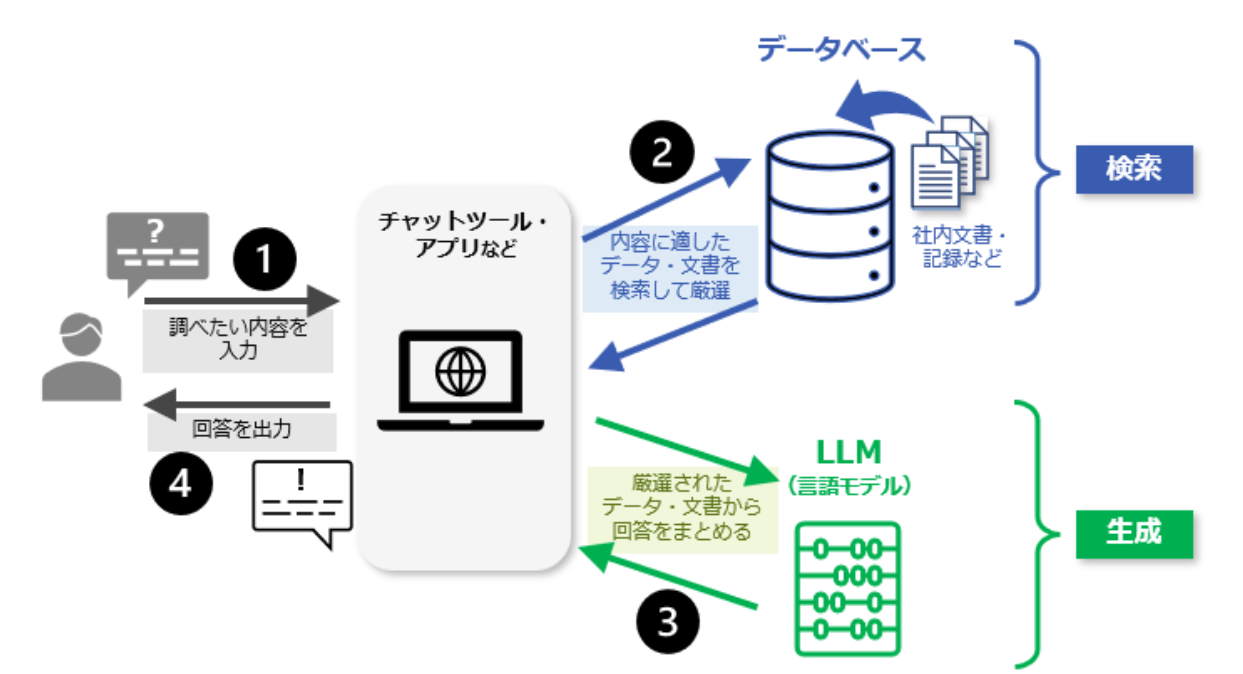

(図参照：https://www.fronteo.com/ai-learning/about-rag）


RAGのシステムを大きく三つに分解すると：
*   文書をどのような形で**保存**するのか？
*   ユーザーからのクエリを基に、保存された文書からどのように**検索**するのか？
*   検索した結果をどのように**要約**してユーザーに返すのか？


# LangChainを使ってシンプルなRAGの構築

### 文書を読み込む

- ファイルの読み込み
https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/file_directory/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_dir='/content/drive/MyDrive/data'

In [ ]:
!pip install langchain langchain-community unstructured[local-inference]

In [ ]:
from langchain.document_loaders import DirectoryLoader

pdf_loader = DirectoryLoader(folder_dir, glob='*pdf')

In [ ]:
documents = pdf_loader.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#タイプは?
type(documents)

list

In [ ]:
#要素の数?
len(documents)

1

In [ ]:
documents[0].page_content

'学則施行細則\n\n目次\n\n建学の理念\n\n２\n\n滋慶学園のミッションとビジョン、３つのポリシー ３\n\n学校長挨拶\n\n４\n\n教育目標、学校の沿革\n\n５\n\n３つのポリシー\n\n６\n\nキャリアとキャリア教育 ７\n\n教育システム ９\n\n学則（抜粋） １２\n\n学則施行細則(２年生・３年生) １５\n\n学則施行細則(４年生) ２１\n\nオンライン授業の開講および受講における注意事項について ２７\n\n学生マニュアル ２８\n\n施設利用マニュアル ３１\n\n学校生活における感染症予防策について ３３\n\n清掃の実施とチェックについて ３４\n\n午前コースと午後コースの昼休みの教室移動について ３４\n\n図書室利用ルール ３５\n\n学生受付事務 ３６\n\n提携医療機関 ３９\n\n同窓会会則 ４１\n\n教育関連法規 ４４\n\n専門士取得 ４６\n\n高度専門士取得 ４７\n\n職業実践専門課程 ４８\n\n個人情報の取り扱いについて ４９\n\nＩＴ・リテラシー ５１\n\n就職活動の心得、就職内定後の心得 ５２\n\n滋慶選択科目履修 ５３\n\n災害時・非常時の対応 ５４\n\n建学の理念\n\n実 学 教 育\n\n人 間 教 育\n\n国 際 教 育\n\n建学の理念とは、学校の教育に対して持っている基本的な考え方です。\n\nすべての授業・研修・学校行事等この理念をベースに組み立てられており、学校にとって大変重要な\n\n考え方なのです。\n\n①実学教育とは\n\n各々の業界で活躍することを夢見ている皆さんにとって、その業界で仕事をするための基本的な技\n\n術であり、知識です。また、資格を取得する必要がある場合は、それに合格する技術・知識を習得\n\nしてもらうことを何より大切と考えています。\n\n即戦力となるために学力（技術力・知識力）を磨きます。無駄な授業はありません。まずは授業に\n\n出席すること、そして授業に没頭することが大切です。\n\n②人間教育とは\n\nいかに技術的に優れていても人間性に欠けていれば決して信頼される人間にはなりません。学校に\n\nは“今日も笑顔であいさつを”の標語がいたるところに掲示されています。\n\n笑顔のあいさつから一日が始まり、人と人とのコミュニケ

In [ ]:
#文字数?
len(documents[0].page_content)

48430

In [ ]:
f = open(folder_dir + '/抽出テキスト.txt', 'w')
f.write(documents[0].page_content) # 上のストリングをテキストファイルで保存
f.close()

### 分割する（チャンキング Chunking）

https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/




In [ ]:
from langchain.text_splitter import CharacterTextSplitter

#テキストを分割(チャンク)する
#なぜ?検索をする際に、チャンク単位で探す
text_splitter = CharacterTextSplitter(chunk_size = 300,#各チャンクが300文字
                                      chunk_overlap=30)

In [ ]:
#チャンクの開始
chunks = text_splitter.split_documents(documents)

In [ ]:
#チャンクの数
len(chunks)

177

In [ ]:
chunks[0].page_content

'学則施行細則\n\n目次\n\n建学の理念\n\n２\n\n滋慶学園のミッションとビジョン、３つのポリシー ３\n\n学校長挨拶\n\n４\n\n教育目標、学校の沿革\n\n５\n\n３つのポリシー\n\n６\n\nキャリアとキャリア教育 ７\n\n教育システム ９\n\n学則（抜粋） １２\n\n学則施行細則(２年生・３年生) １５\n\n学則施行細則(４年生) ２１\n\nオンライン授業の開講および受講における注意事項について ２７\n\n学生マニュアル ２８\n\n施設利用マニュアル ３１\n\n学校生活における感染症予防策について ３３\n\n清掃の実施とチェックについて ３４\n\n午前コースと午後コースの昼休みの教室移動について ３４\n\n図書室利用ルール ３５'

In [ ]:
chunks[1].page_content

'図書室利用ルール ３５\n\n学生受付事務 ３６\n\n提携医療機関 ３９\n\n同窓会会則 ４１\n\n教育関連法規 ４４\n\n専門士取得 ４６\n\n高度専門士取得 ４７\n\n職業実践専門課程 ４８\n\n個人情報の取り扱いについて ４９\n\nＩＴ・リテラシー ５１\n\n就職活動の心得、就職内定後の心得 ５２\n\n滋慶選択科目履修 ５３\n\n災害時・非常時の対応 ５４\n\n建学の理念\n\n実 学 教 育\n\n人 間 教 育\n\n国 際 教 育\n\n建学の理念とは、学校の教育に対して持っている基本的な考え方です。\n\nすべての授業・研修・学校行事等この理念をベースに組み立てられており、学校にとって大変重要な\n\n考え方なのです。'

### チャンク毎にベクトル化を行いデータベースに保存

In [ ]:
!pip install openai tiktoken

In [ ]:
from langchain.embeddings import AzureOpenAIEmbeddings

AZURE_OPENAI_API_KEY ="4fdd3135c3a94d9e920354bec1fa3f7f"
AZURE_OPENAI_ENDPOINT = "https://tech-ai-ml-class-shima.openai.azure.com/"

embeddings = AzureOpenAIEmbeddings(
    openai_api_base = AZURE_OPENAI_ENDPOINT,
    openai_api_key = AZURE_OPENAI_API_KEY,
    deployment = "text-embedding-ada-002"
)


/usr/local/lib/python3.10/dist-packages/langchain_community/embeddings/azure_openai.py:113: UserWarning: As of openai>=1.0.0, Azure endpoints should be specified via the `azure_endpoint` param not `openai_api_base` (or alias `base_url`). Updating `openai_api_base` from https://tech-ai-ml-class-shima.openai.azure.com/ to https://tech-ai-ml-class-shima.openai.azure.com//openai.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain_community/embeddings/azure_openai.py:120: UserWarning: As of openai>=1.0.0, if `deployment` (or alias `azure_deployment`) is specified then `openai_api_base` (or alias `base_url`) should not be. Instead use `deployment` (or alias `azure_deployment`) and `azure_endpoint`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain_community/embeddings/azure_openai.py:128: UserWarning: As of openai>=1.0.0, if `openai_api_base` (or alias `base_url`) is specified it is expected to be of the form https://example-resource.azure.openai.com/openai/d

In [ ]:
result = embeddings.embed_query('おはよう')

In [ ]:
result = embeddings.embed_query

In [ ]:
result

[0.00792752348311088,
 -0.0058997000066322025,
 -0.0049935162072266715,
 -0.007572654677406931,
 -0.007559980774858173,
 0.027882578156686322,
 -0.001002822248132149,
 -0.004515076735257022,
 -0.015525526431276587,
 -0.007458589554468114,
 0.023636822199836344,
 0.00023862575594220997,
 -0.015145309354813861,
 -0.030189227489237663,
 -0.012376062812063502,
 -0.021089368253197346,
 0.02712214400376087,
 -0.022344083208540554,
 0.019162935065786205,
 -0.017591371149740277,
 -0.011235411582675327,
 -0.013953962515230657,
 -0.010589043018349955,
 -0.010975596813256428,
 -0.020949954859499752,
 0.0038148435030228548,
 -0.0035075014826308005,
 -0.01595643818661182,
 0.008161991378754785,
 -0.026184276146475338,
 0.020050109175521753,
 -0.0022654594985138266,
 -0.015994460359919353,
 0.010246847183872242,
 -0.010417945101111098,
 -0.03371257146646973,
 -0.007078372478005388,
 -0.0023209078803722986,
 0.015272048380301438,
 -0.002183079131946903,
 0.02501827711198965,
 -0.014397549570098431,
 

In [ ]:
len(result)

1536

In [ ]:
#ライブラリ
!pip install chromadb
#ベクトルデータベースって言われている

In [ ]:
from langchain.vectorstores import Chroma
vectorstore = Chroma.from_documents(documents=chunks,
                                    embedding=embeddings)

### 検索を試してみる

In [ ]:
#類似検索
input = '禁止されたこと'

docs = vectorstore.similarity_search(input)

docs

[Document(page_content='しない。\n\n（学生心得）\n\n第３１条 学生としての身だしなみは、医療人を目指す学生としてふさわしいものとする。\n\n２．授業中に講師の許可なく通信機器の使用は禁止とする。\n\n３．授業中に講師の許可なく飲食は禁止とする。また、無断で教室から出ることを禁止する。\n\n４．職員室に入室の際は、コート、サングラス、帽子等を所定の場所へ置くこと。\n\n５．使用した教室は必ず清掃をすること。\n\n６．提出期限は守ること。\n\n７．元気よく挨拶をすること。\n\n８．学校生活上、合理的配慮が必要な場合は必ず担任に相談して対応を図ること。\n\n（破損・損失）', metadata={'source': '/content/drive/MyDrive/data/gakusoku.pdf'}),
 Document(page_content='しない。\n\n（学生心得）\n\n第３１条 学生としての身だしなみは、医療人を目指す学生としてふさわしいものとする。\n\n２．授業中に講師の許可なく通信機器の使用は禁止とする。\n\n３．授業中に講師の許可なく飲食は禁止とする。また、無断で教室から出ることを禁止する。\n\n４．職員室に入室の際は、コート、サングラス、帽子等を所定の場所へ置くこと。\n\n５．使用した教室は必ず清掃をすること。\n\n６．提出期限は守ること。\n\n７．元気よく挨拶をすること。\n\n８．学校生活上、合理的配慮が必要な場合は必ず担任に相談して対応を図ること。\n\n（破損・損失）', metadata={'source': '/content/drive/MyDrive/data/gakusoku.pdf'}),
 Document(page_content='由を付して学校長の許可を得なければならない。\n\n（証明書）\n\n第２３条 学生が、在学証明書、成績証明書、卒業見込証明書等の交付を受けようとする場合には所定\n\nの申し込みをしなければならない。\n\n（施設利用）\n\n第２４条 学生が施設を使用する時は、施設使用願を担任へ提出し承認を受けなければならない。施設\n\n使用後は室内を整理整頓し、担任の点検を受けなければならない。\n\n（図書室利用）\n\n第２５条 断りな

In [ ]:
#似ているチャンクを持ってくる
#いくつ? ->上位四つ
len(docs)

4

In [ ]:
for j in range (len(docs)):
  print(docs[j].page_content)

３．授業開始時刻より１時間１５分以降の退室は早退として認められる。それ以前については欠

席とする。

４．遅刻・早退については合わせて３回で１回欠席とする。

第４章 休講規程

（休 講）

第１６条 学校指定の時刻と地域に、気象庁により「特別警報」または「警報（大雨、洪水、暴風、

暴風雪、大雪）」が出されている場合（以下「警報等」という）は休講とする。

（１）前項の学校指定の時刻とは、当日の朝６時（午前の授業）、午前１０時（午後の授業）、

午後２時（夜間部の授業）をいう。

（２）前項の学校指定の地域とは、東京都２３区東部（江戸川区、台東区、墨田区、江東区、
３．授業開始時刻より１時間１５分以降の退室は早退として認められる。それ以前については欠

席とする。

４．遅刻・早退については合わせて３回で１回欠席とする。

第４章 休講規程

（休 講）

第１６条 学校指定の時刻と地域に、気象庁により「特別警報」または「警報（大雨、洪水、暴風、

暴風雪、大雪）」が出されている場合（以下「警報等」という）は休講とする。

（１）前項の学校指定の時刻とは、当日の朝６時（午前の授業）、午前１０時（午後の授業）、

午後２時（夜間部の授業）をいう。

（２）前項の学校指定の地域とは、東京都２３区東部（江戸川区、台東区、墨田区、江東区、
17

ある場合に限る）

⑤ 公欠願は各学期の定期試験前週までの提出に限り認められる。

⑥ 公欠の際には追試を実施する。

⑦ 上記以外で特別な事情がある場合、教務部長が判断する。

（８）実習・授業等において何らかの理由により見学を認められた場合は、届出書（診断書

もしくは証明書、見学届）と授業終了後のレポート提出にて欠席時数に算入しない。

（遅刻・早退）

第１５条 授業開始時刻より１５分までの入室は遅刻として認められる。それ以後については入室を許

可されるが、欠席とする。

２．交通機関の事故等による遅刻は、遅延証明書の提出によって遅刻を免除する場合がある。
⑤ 公欠願は各学期の定期試験前週までの提出に限り認められる。

⑥ 公欠の際には追試を実施する。

⑦ 上記以外で特別な事情がある場合、教務部長が判断する。

（８）実習・授業等において何らかの理由により見学を認められた場合は、届出書（診断書

もしくは証明書、

### 検索を基に要約をする

In [ ]:
#検索内容をストリングにまとめる
'\n\n'.join([doc.page_content for doc in docs])

'しない。\n\n（学生心得）\n\n第３１条 学生としての身だしなみは、医療人を目指す学生としてふさわしいものとする。\n\n２．授業中に講師の許可なく通信機器の使用は禁止とする。\n\n３．授業中に講師の許可なく飲食は禁止とする。また、無断で教室から出ることを禁止する。\n\n４．職員室に入室の際は、コート、サングラス、帽子等を所定の場所へ置くこと。\n\n５．使用した教室は必ず清掃をすること。\n\n６．提出期限は守ること。\n\n７．元気よく挨拶をすること。\n\n８．学校生活上、合理的配慮が必要な場合は必ず担任に相談して対応を図ること。\n\n（破損・損失）\n\nしない。\n\n（学生心得）\n\n第３１条 学生としての身だしなみは、医療人を目指す学生としてふさわしいものとする。\n\n２．授業中に講師の許可なく通信機器の使用は禁止とする。\n\n３．授業中に講師の許可なく飲食は禁止とする。また、無断で教室から出ることを禁止する。\n\n４．職員室に入室の際は、コート、サングラス、帽子等を所定の場所へ置くこと。\n\n５．使用した教室は必ず清掃をすること。\n\n６．提出期限は守ること。\n\n７．元気よく挨拶をすること。\n\n８．学校生活上、合理的配慮が必要な場合は必ず担任に相談して対応を図ること。\n\n（破損・損失）\n\n由を付して学校長の許可を得なければならない。\n\n（証明書）\n\n第２３条 学生が、在学証明書、成績証明書、卒業見込証明書等の交付を受けようとする場合には所定\n\nの申し込みをしなければならない。\n\n（施設利用）\n\n第２４条 学生が施設を使用する時は、施設使用願を担任へ提出し承認を受けなければならない。施設\n\n使用後は室内を整理整頓し、担任の点検を受けなければならない。\n\n（図書室利用）\n\n第２５条 断りなく図書室外への本の持ち出しは禁止する。\n\n２．図書室への飲食物の持ち込みは禁止する。\n\n３．私語は禁止する。\n\n４．図書室の図書を紛失した時は、弁償する。\n\n（掲 示）\n\n由を付して学校長の許可を得なければならない。\n\n（証明書）\n\n第２３条 学生が、在学証明書、成績証明書、卒業見込証明書等の交付を受けようとする場合には所定\n\nの申し込みをしなければならない。\n\n

In [ ]:
#関数
def format_docs(docs):
  return '\n\n'.join([doc.page_content for doc in docs[:2]])

In [ ]:
# 以下は第３回でやった内容
from langchain.chat_models import AzureChatOpenAI

llm = AzureChatOpenAI(
    openai_api_version='2023-05-15',
    openai_api_key=AZURE_OPENAI_API_KEY,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    deployment_name='gpt-35-turbo-0613'
)

In [ ]:
llm.predict('おはよう')

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


'おはようございます！朝から元気ですね。何かお手伝いできることはありますか？'

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

template = '''
必ず「検索結果」を基に、「ユーザーからの質問」を答えなさい。
出力

{input1}


{input2}

'''

prompt_template = PromptTemplate(
    input_variables = ['input1', 'input2'],
    template=template
)

chain = LLMChain(llm=llm, prompt=prompt_template)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [ ]:
def extract_information(input):
  #文書から似ているチャンクを抽出
  docs = vectorstore.similarity_search(input)
  #検索結果をストリングにまとめる
  docs_string = format_docs(docs)
  #検索結果を基にLLMに要約させる
  ans = chain.run(input1=input, input2=docs_string)
  return ans



In [ ]:
info = extract_information('禁止事項')
print(info)

禁止事項は以下の通りです。

1. 授業中に講師の許可なく通信機器の使用は禁止とする。
2. 授業中に講師の許可なく飲食は禁止とする。また、無断で教室から出ることを禁止する。
3. 職員室に入室の際は、コート、サングラス、帽子等を所定の場所へ置くこと。
4. 使用した教室は必ず清掃をすること。
5. 提出期限は守ること。
6. 元気よく挨拶をすること。
7. 学校生活上、合理的配慮が必要な場合は必ず担任に相談して対応を図ること。
8. 施設利用や図書室利用においては、所定の手続きや規則を守ること。

また、以下の事項については許可を得る必要があります。

1. 破損や損失が発生した場合は、学校長の許可を得なければならない。
2. 在学証明書、成績証明書、卒業見込証明書などの交付を受ける場合は、所定の申し込みをしなければならない。


https://fintan.jp/page/10301/